# A/B-анализ крупного интернет-магазина

Наша задача провести приоритезацию гипотез, запустить A/B-тест и проанализируйть результаты.


###### Данное исследование разделим на несколько частей.

##### Часть 1. Изучение общей информации:
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек, подготовка данных](#1-bullet)

##### Часть 2. Анализ данных:
* [1. Приоритизация гипотез.](#2-bullet)
* [2. А/B-тесты.](#3-bullet)


##### Часть 4. Выводы :
* [1. Общий вывод.](#4-bullet)


<a id='1-bullet'></a>

### Изучение общей информации о таблице

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt

In [2]:
df = pd.read_csv('hypothesis.csv')
df.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [3]:
orders = pd.read_csv('orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
visitors = pd.read_csv('visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


#### Вывод

Итак, мы выгрузили три таблицы. В первой у нас 10 строк с гипотезами и четырьмя показателями. В остальных таблицах собраны данные для исследования A/B теста.

<a id='2-bullet'></a>

## Предобработка данных

In [7]:
df.columns=df.columns.str.lower()

In [8]:
orders=orders.rename(columns={'transactionId': 'transaction_id' ,'visitorId': 'visitor_id' })

In [9]:
orders['date']=pd.to_datetime(orders['date'])

In [10]:
visitors['date']=pd.to_datetime(visitors['date'])

### Вывод:

Мы привели названия столбцов к удобным названиям и данные к нужным типам.

<a id='3-bullet'></a>

## Приоритизация гипотез

In [12]:
df['ice']=df['impact']*df['confidence']/df['efforts']

In [13]:
df['rice']=df['reach']*df['impact']*df['confidence']/df['efforts']

In [14]:
df.sort_values(by=['ice'], ascending = False)[['hypothesis', 'ice']]

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


In [15]:
df.sort_values(by=['rice'], ascending = False)[['hypothesis', 'rice']]

,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Итак, мы посчитали такие показатели как ICE и RICE.

### Вывод

Заметим, что гипотезы 1,3,4,5 находятся в конце топа по двум показателям. Похожее единство есть в начале рейтинга. Для метода приоритизации ICE выбились в лидеры гипотезы такие, как:
* 'Запустить акцию, дающую скидку на товар в день рождения'
* 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
* 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

Для RICE:
* 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
* 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
* 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'

То есть две гипотезы совпадают, это можно объяснить совпадением некоторых параметров в формуле. Но в топе-3 RICE нет  такой гипотезы, как 'Запустить акцию, дающую скидку на товар в день рождения' и есть гипотеза 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'. Такое небольшое различие получилось из-за разницы рассчета показателей. Для RICE важно скольких пользователей затронет изменение, поэтому чем больше человек будет затронуто, тем больше RICE. По этой причине гипотеза 8 упала в позиции, а 2 поднялась.

<a id='3-bullet'></a>

### Анализ A/B-теста

#### Построение графика кумулятивной выручки по группам и кумулятивного среднего чека по группам.

In [16]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [17]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
    'date' : 'max', 
    'group' : 'max', 
    'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [18]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


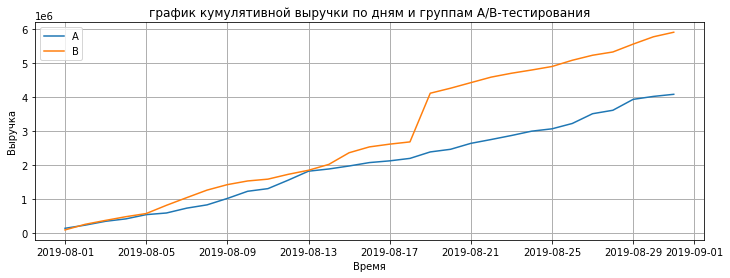

In [20]:
# Строим график выручки группы А
plt.figure(figsize=(12, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title("график кумулятивной выручки по дням и группам A/B-тестирования")
plt.xlabel('Время')
plt.ylabel('Выручка')
plt.grid( linestyle='-', linewidth=1)
plt.legend()
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
</div>
Однако график  выручки  группы В в нескольких точках резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

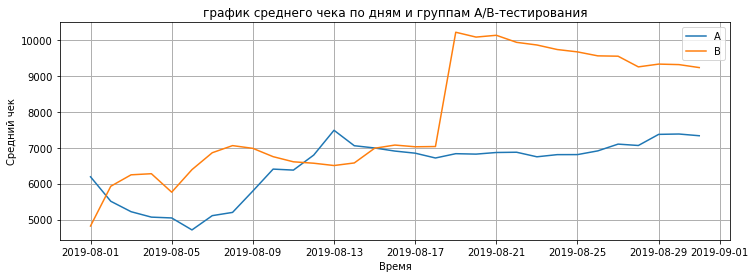

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title("график среднего чека по дням и группам A/B-тестирования")
plt.xlabel('Время')
plt.ylabel('Средний чек')
plt.grid( linestyle='-', linewidth=1)
plt.legend()
plt.show()

А средний чек становится равномерным ближе к концу теста. Видим резкий всплеск среднего чека у группы В между 17-21 числом.  Возможно, в группу B в середине теста попали крупные заказы.Похожая ситуация у группы А, но подЪем не настолько резкий.


#### Построение графиков относительного изменения кумулятивного среднего чека группы B к группе A,   кумулятивной конверсии по группам, относительного изменения кумулятивной конверсии группы B к группе A.

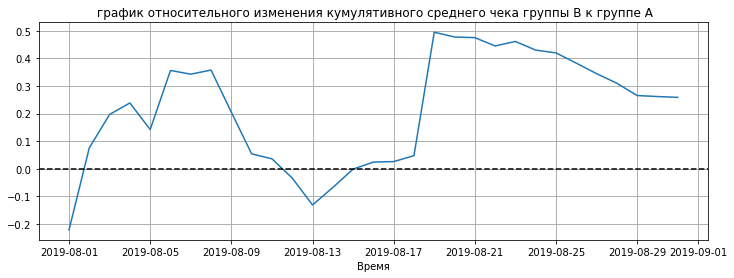

In [22]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.figure(figsize=(12, 4))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title(" график относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel('Время')
#plt.ylabel('Выручка')
plt.grid( linestyle='-', linewidth=1)
#plt.legend()
plt.show()

В нескольких точках график различия между сегментами резко «скачет», следовательно где-то были крупные заказы и выбросы. Мы найдем их ниже.

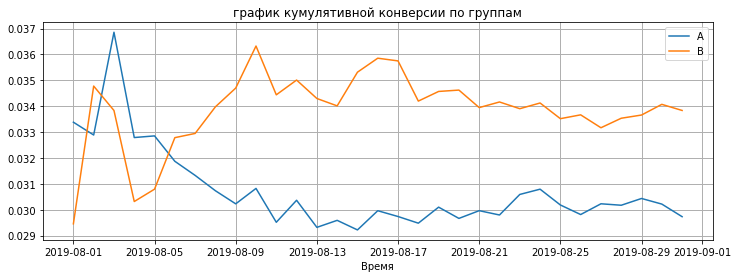

In [23]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title("график кумулятивной конверсии по группам")
plt.xlabel('Время')
plt.grid( linestyle='-', linewidth=1)
plt.legend()
plt.show()


Симметричный график получился после 5 августа. Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы B просела и также зафиксировалась.

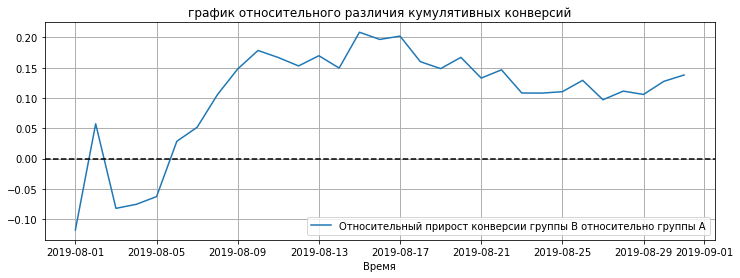

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='black', linestyle='--')
#plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title("график относительного различия кумулятивных конверсий")
plt.xlabel('Время')
plt.grid( linestyle='-', linewidth=1)
plt.legend()
plt.show()


В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Далее в течение оставшегося времени она оставалась стабильной.

#### Построение точечного графика количества заказов по пользователям

In [25]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']

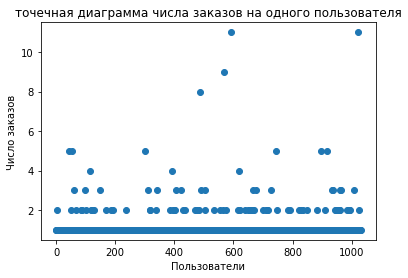

In [26]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('точечная диаграмма числа заказов на одного пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Число заказов')
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна.
Их точная доля не ясна — непонятно, считать их аномалиями или нет.
</div>
Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [27]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


5% клиентов купили больше 2 раз, а 1% купили боле 4 раз.

#### Построение точечного графика стоимостей заказов. 

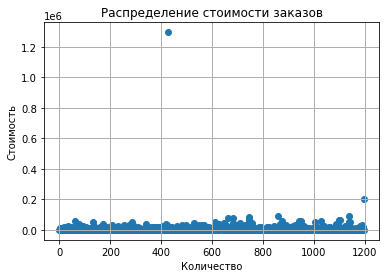

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.xlabel('Количество')
plt.ylabel('Стоимость')
plt.grid( linestyle='-', linewidth=1)
plt.show()

Большая часть значений не выходит за отметку в 200000, но есть пару анамальных значений.

In [29]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


5% выходит за отметку в 28000, 1% за 58233.

#### Cтатистическая значимость различий в конверсии и  в среднем чеке заказа между группами по «сырым» данным.

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей

In [30]:

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']



In [31]:
ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']



In [32]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [33]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [34]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [35]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("относительный выигрыш: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.008
относительный выигрыш: 0.138


Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Однако относительный выигрыш группы B равен 13% — второе число в выводе.

Вывод: По «сырым» данным различия в конверсии групп A и B есть.

In [36]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.365
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы А значительно ниже среднего чека группы В.
Напомним, что найденные 95-й и 99-й перцентили средних чеков равны  28000 и  58233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 20 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 20 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей методом shape().

In [37]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

568     113298937
1099    148427295
461     154576532
18      199603092
928     204675465
dtype: int64
(90,)


Всего 14 аномальных пользователей.

#### Статистическую значимость различий в конверсии и в среднем чеке заказа между группами по «очищенным» данным. 

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [38]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [39]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.011
0.153


Результаты по конверсии практически не изменились.  P-value стало чуть выше, но не больше 0.05. Однако относительный выигрыш группы B стал на 2 % выше.

Вывод: По «чистым» данным различий в конверсии групп A и B нет.

In [40]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.464
-0.005


P-value увеличился, поэтому  причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. А разница между сегментами сильно изменилась.

<a id='4-bullet'></a>

### Общий вывод:

* Статистически значимое различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий есть;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A и есть значительные тенденции к улучшению:
* График различия среднего чека говорит о том, что результаты группы B ухудшаются день ото дня и сейчас почти на 20% хуже:
Исходя из обнаруженных фактов, тест следует остановить и признать его неуспешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A — практически нулевая.